<a href="https://colab.research.google.com/github/tamburins/ESAA_2023/blob/main/ESAA_5_22_keras(50_86).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PART 3 KERAS
## 01 딥러닝 준비

고수준의 딥려닝 라이브러리 케라스는 gpu 연산을 직접 수행하지 않고 텐서플로, cntk, theano, mxnet 등 ㅂㅔㄱ엔드 엔진을 지정하여 사용한다.

케라스의 본래 목적 자체가 딥러닝 라이브러리으 ㅣ쉽고 간결한 실행이기 때문에 어렵지 않으며 벡엔드 엔진을 쉽게 변경할 수 있다는 장점이 있으나, 모델구현이 복잡하고 사용자정의 훈령르 위해 텐서플로의 저수준 api 를 활용해야한다는 한계쩜도 분명하다.

## 1-1 주요 용어
### 1-1-1 하이퍼파라미터
딥러닝의 하이퍼파라미터는 파이썬과는 다른 의미로 머신러닝 모델을 훈련할 때 사용자가 직접 설정해주는 설정값으로 모델이 훈련하면서 가중치와 편향은 자동 업데이트되고 조정되며 알아서 변하는 값들이지만 그 외의 학습속도나 반복 훈련횟수 등 사용자가 직접 설정해야 하는 값이 많다.

이렇게 사용자가 직접 설정해야 하는 값들을 하이퍼파라미터라 하며, 사용자가 어떤 값을 설정하느냐에 따라 모델 성능과 결과가 달라지므로 중요하다. 정해주지 않으면 기본 설정값으로 실행된다.
 모델 성능 개선을 위해 값을 조절하는 것을 하이퍼파라미터 튜닝이라 한다.


 ### 1-1-2 과소적합 vs 과대적합

 머신러닝 학습에 있어서 데이터는 크게 훈련용데이터와 예측용 데이터로 구분한다. 훈련용 데이터는 말 그대로 머신러닝 모델이 학습할 데이터를 말하며 트레이닝 셋 또는 트레인 셋이라 말하며 예측용 데이터는 정답레이블이 없는 머신러닝 모델이 예측해야 하는 대상데이터를 의미한다.

 머신러닝에서 주어진 훈련데이터에서 패턴학습을 통해 모델을 완성해나간다. 훈련용 데이터를 반복적으로 학습하면서 모델은 사람이 발견하지 못하는 패턴을 발견하므로써 사람의 예측성능을 뛰어넘는 모델을 생성할 수 있다. 하지만 예측할 데이ㅓㅌ가 모델이 학습한 데이터와 다른 분포를 갖거나 학습 데이터가 특정 레이블에 편향된 데이터로 이루어져 있ㄴ다면 모델이 학습한 후 예측성능이 현저히 떨어지게 된다.

 모델이 충분히 학습되지 않은 경우 예측 성능이 떨어진다. 이 상태를 과소적합되었다고 한다. 그와는 반대로 학습데이터를 지나치게 반복학습하게 되어 과하가 적합되면 불필요한 노이즈까지 모델에 반영되어 예측오차가 커지는데 이를 과대적합이라 한다.

 모델 학습시에는 과소적합과 과대적합 문제를 최소화하면서 정확도를 가장 높일 수있도록 해야한다. 예측 데이터와 분포가 동일하게 구성해야 하며, 불필요한 노이즈는 데이터분석 및 전처리를 통해 해소해야한다. 또한 훈련데이터 일부를 검증데이터로 활용하여 검증 성능이 가장 좋은 구간을 모델의 가장 이상적으로 학습된 지점이라 판단하는 방법으로 최종 모델을 결정한다.

 ### 1-1-3 에포크
 딥러닝은 데이터셋을 학습하는 과정을 여러번 반복함녀서 최적의 모델 가중치를 찾는 과정으로 딥러닝 모델이 반복 훈련은 데이터셋을 전부 학습에 사용하는 1회의 훈련 루프를 1epoch이라 한다. 사전에 설정한 최대 에폭횟수까지 반복적으로 진행하고 종료된다. 과소적합 및 과대적합시 에폭수를 조절하여 방지할 수 있다.

 ### 1-1-4 손실함수
 예측 함수와 정답값의 차이 또는 오차로 모델에 따라 손실함수를 다르게 적용한다.

 지도학습의 분류모델은 이진분류와 다중 분류로 나뉘는데 이진분류는 binary crossentropy 로 출력층의 활성화함수가 시그모이드인 함수를 얘기한다. 다중분류문제에는 카테고리 크로스 엔트로피 손실 함수를 사용하며 다중분류의 대상이 클래스가 원핫벡터인 경우 사용한다.

 정답 클래스가 원핫인코딩이 아닌 레이블값으로 표현되어 서로 다른 숫자로 구분되어 있으면 sparse categorical crossentropy 손실함수를 사용한다.

 다중 분류 문제에서는 출력층의 softmax를 사용한다. 한편 회귀모델의 경우 mse와 mae, huber 등이 사용된다.

 텐서플로는 사전 정의된 손실함수를 함수형과 클래스형으로 제공하고 있으며 일반적으로 많이 사용하는 손실함수 목록은 다음과 같다.

 다음 예제와 같이 클래스 및 함수형태로 정의되어 있는 손실함수를 지정하여 사용한다.

In [1]:
import tensorflow as tf
#class
tf.keras.losses.BinaryCrossentropy()
#function
tf.keras.losses.binary_crossentropy

<function keras.losses.binary_crossentropy(y_true, y_pred, from_logits=False, label_smoothing=0.0, axis=-1)>

딥러닝 문제에 따라 텐서플로의 손실함수로 해결이 어려운 경우 직접 손실함수를 만들 수 있다.

### 1-1-5 경사 하강법
경사하강법은 딥러닝 모델을 훈련할 때 모델 내부의 가중치에 대한 미분값을 구하고 목적 함수값이 낮아지는 방향으로 차감하면서 결국 최소함수 값을 갖도록 하는 방법이다.

딥러닝 훈련프로세스에서 경사하강법 알고리즘을 적용하여 손실함수 값을 최소로 만드는 가중치를 찾을 수 있다.

손실함수 혹은 목적함수는 
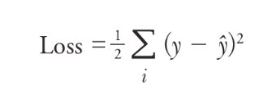

로 1/2가중치에 대한 그레디언트를 계산하기 쉽도록 추가한 상수값이며 y=wx + b 라는 선형회귀 식에서 손실함수를 최소로 하는 w,b를 구하는 과정을 경사하강법으로 구현한다. 

샘플데이터셋을 생섣ㅇ하는 함수를 정의하고 임의의 w,b값을 지정하여 주어진 x,y를 생성하며 노이즈를 추가한다.



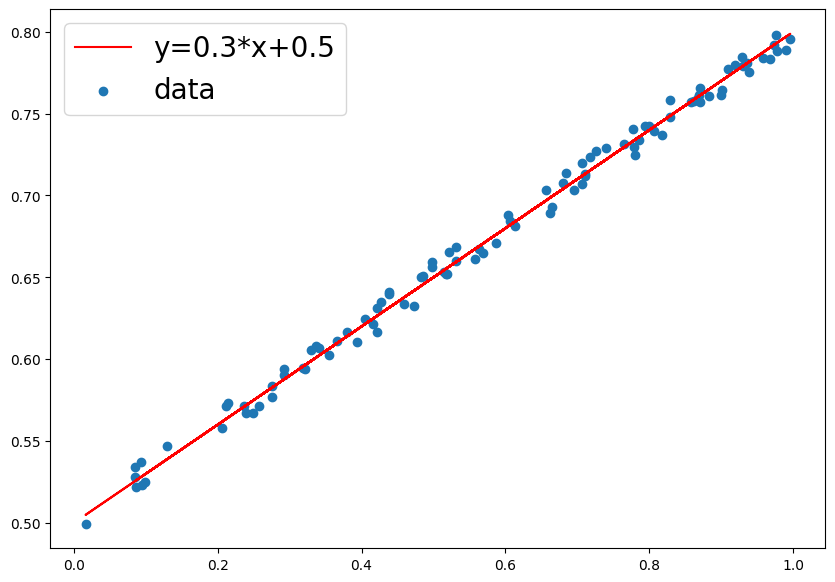

w: 0.3, b:0.5


In [2]:
import numpy as np
import matplotlib.pyplot as plt

def make_linear(w=0.5, b=0.8, size=50, noise=10):
  x=np.random.rand(size)
  y=w*x+b
  noise = np.random.uniform(-abs(noise),abs(noise), size=y.shape)
  yy=y+noise
  plt.figure(figsize=(10,7))
  plt.plot(x,y,color='r', label=f'y={w}*x+{b}')
  plt.scatter(x, yy, label='data')
  plt.legend(fontsize=20)
  plt.show()
  print(f'w: {w}, b:{b}')
  return x,yy

x,y=make_linear(w=0.3, b=0.5, size=100, noise=0.01)

앞의 실행 결과를 보면 실제 생성된 데이터는 식과 완전히 일치하지 않고 약간의 노이즈가 추가된 것을 확인할 수 있다.

이제 경사하강법 알고리즘의 핵심인 w, b에 대한 그래디언트를 구하는 부분만 구현하면 된다. 그래디언트는 소닛ㄹ함수를 w,b 에 대한 각각의 편미분값을 구한 뒤 학습률 계수를 곱하여 이전의 w,b로부터 차감한다

즉 가설함수를 yhat = wx+b로 정의

손실함수는 y데이터에서 yhat을 뺀 값의 제곱합*1/2로 정의

alpha는 학습률을 의미한다.

손실함수를 w에 대한 편도함수로 유도하면 추정치와 데이터 사이의 차에 대해 x값을 곱한 것과 같으며 이를 가중치변화량인 그래디언트라 정의할 수 있다. 또한 그래디언트 업데이트 최종 수식은 이 수식에 alph를 곱하여 w에서 뺀 값이며 이와 동일하게 편도함수를 유도하고 학습률을 곱하여 그래디언트 b 업데이트 최종 수식을 구할 수 있다.

In [3]:
# numpy로 최적화
# maximum trial
num_epoch = 1000
#learning rate
learning_rate = 0.005
#error
errors = []

# random값으로 w,b초기화
w = np.random.uniform(low=0.0, high=1.0)
b = np.random.uniform(low=0.0, high=1.0)

for epoch in range(num_epoch):
  # hypothesis 정의 
  y_hat = w*x+b

  # lossfunction 정의 
  error = 0.5 * ((y_hat - y)**2).sum()
  if error<0.005:
    break
  #gradient 미분 계산
  w = w - learning_rate * ((y_hat - y)*x).sum()
  b =b - learning_rate*((y_hat-y)).sum()

  errors.append(error)

  if epoch%5==0:
    print('{0:2}w = {1:.1f}, b={2:.1f} error={3:.5f}'.format(epoch, w, b, error))
print('-------------'*15)
print('{0:2}w = {1:.1f}, b={2:.1f} error={3:.5f}'.format(epoch, w, b, error))


 0w = -0.0, b=0.8 error=2.48749
 5w = -0.0, b=0.7 error=0.39628
10w = 0.0, b=0.7 error=0.30271
15w = 0.1, b=0.7 error=0.23134
20w = 0.1, b=0.6 error=0.17689
25w = 0.1, b=0.6 error=0.13535
30w = 0.1, b=0.6 error=0.10365
35w = 0.2, b=0.6 error=0.07947
40w = 0.2, b=0.6 error=0.06102
45w = 0.2, b=0.6 error=0.04694
50w = 0.2, b=0.6 error=0.03620
55w = 0.2, b=0.6 error=0.02801
60w = 0.2, b=0.5 error=0.02176
65w = 0.2, b=0.5 error=0.01699
70w = 0.2, b=0.5 error=0.01335
75w = 0.2, b=0.5 error=0.01057
80w = 0.3, b=0.5 error=0.00846
85w = 0.3, b=0.5 error=0.00684
90w = 0.3, b=0.5 error=0.00561
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
94w = 0.3, b=0.5 error=0.00483


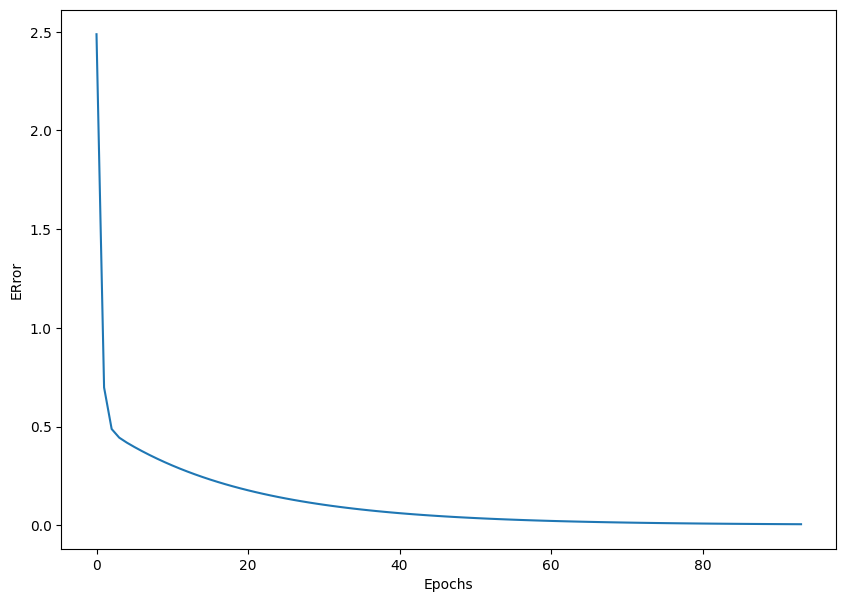

In [4]:
plt.figure(figsize=(10,7))
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('ERror')
plt.show()

가중치가 난수값에 따라 다르게 초기화되기 때문에 수렴속도에 차이는 있으나 결국 목표하는 오차범위 안으로 수렴하여 반복문을 종료하게 되고 종료후 w,b 계수를 확인하면 샘플 데이터셋을 생성할 때 설정한 w, b 계수와 비슷한 값임을 확인할 수 있다.

## 1-2 딥러닝 프로세스
딥러닝 모델 구축 훈련은 다음과 같다
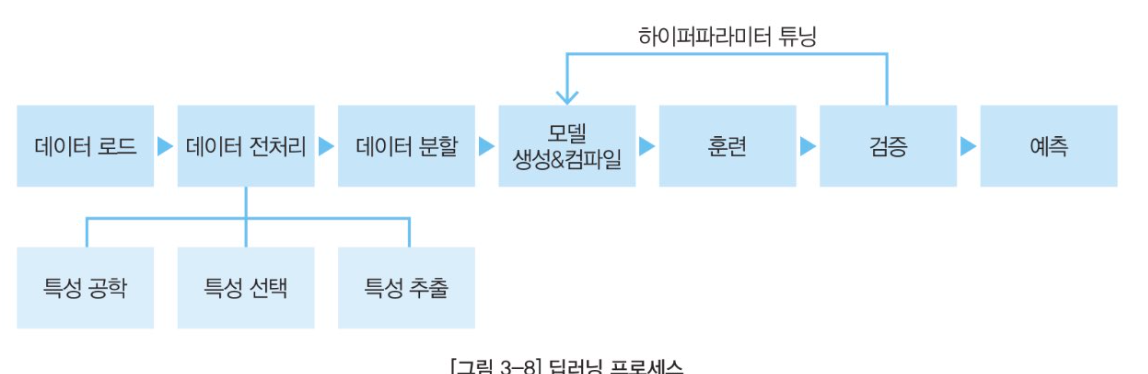

### 1-2-1 데이터 전처리
데이터를 모델에 주입하기 전에 데이터를 가공하는 단계로 데이터셋의 종류와 적용하려는 문제유형에 따라 전처리 방법은 다양하다.

배열의 차원을 변경하거나 스케일을 조정한다. 모델이 입력 받을 데이터셋의 형태와 전처리 단계의 데이터셋이일치해야 한다.

### 1-2-2 모델 생성 
모델의 구조를 정의하고 생성하는 단계로 순차적인 모델은 sequential api, 다중입력 출력을 갖는 모델은 functional, model subclassing 방법으로 구현한다.

### 1-2-3 모델컴파일
딥러닝 모델의 구조를 정의하고 생성한 뒤 생성된 모델 훈련에 사용할 손실함스 ,옵티마이저, 평가지표 등을 정의한다. 모델 인스턴스에 compile 메소드를 적용하고 앞에서 열거한여러 속성값을 정의한다.

### 1-2-4 모델훈련
fit()함수에 모델 훈련에 필요한 정볼르 매개변수로 전달한다. 훈련데이터셋, 검증 데이터셋, 에폭 ,배치크기 및 콜벡 함수등을 지정한다.

### 1-2-5 모델 검증
모델훈련시 사용하지 않은 검증데이터셋을 모델에 입력하고 모델의 예측값을 정답과 비교하여 평가지표를 계산한다. 반환된 검증결과를 토대로 잠재적인 모델의 성능평가가 이ㅝ진다, 검증 결과를 방탕으로 다시 모델 생성단계로 돌아가 모델 수정을 하고 커마일 훈련 과정을 거쳐 재평가하는 단계를 통해 목표성능에 도달할 때까지 이 과정을 반복한다.

### 1-2-6 모델 예측
모델이 예측하고 그 결과를 반환한다.



# 02 단순 신경망 훈련
## 2-1 선형 회귀
하나이상의 독립변수들이 종속변수에 미치는 영향을 추정하는 통계기법으로 그 중 단순선형회귀모형은 하나의 x 가 y 에 미치는 영향을 추정하며 1차 함수 관계로 나타낼 수 있다.

이번에는 텐서플로 케라스를 활용하여 단순선형회귀모델을 직접 만들고 딥러닝을 학습한다. 모델은 1차함수식과 동일하며 기울기와 절편을 업데이트하며 종속변수에 가장 근사한 1차함수식을 완성해나간다. 딥러닝에서는 기울기 대신 가중치를 의미하는 w를 많이 사용한다,

## 2-2 뉴런
인공신경망 모델을 구성하는 하나의 신경을 의미하며 노드라고도 불린다. 신경망은 여러 레이어를 가지며 하나의 레이어는 1개 이상의 뉴런을 갖는다. 뉴런 내부에는 가중치가 존재하고 모뎅ㄹ이 훈련을 진행하며 오차 역젆파를 통해 뉴런의 가중치가 업데이트된다.

역전파란 신경망 모델의 파라미터들에 대한 그래디언트를 계산하는 방법을 의미한다. 역전파는 신경망을 구성하는 각 레이어와 관련된 손실함후를 미분한 결과인 그래디언트를 출력층에서 입려긏ㅇ 순으로 역으로 계산하고 저장한다.

## 2-3 dense 레이어

심층 신경망 모델을 구성하는 가장 기본 레이어로 각 레이어와 레이어 사이에 모든 뉴런이 서로 연결되어 있기 때문에 완전 연결층이라 부르기도 한다. 

예시 모델은 각 레이어가 1개이상의 뉴런으로 구성되며 모든 뉴런들이 정보의 흐름을 나타내는 화살표로 연결되어 있어 완전 연결층이라고 정의된다.

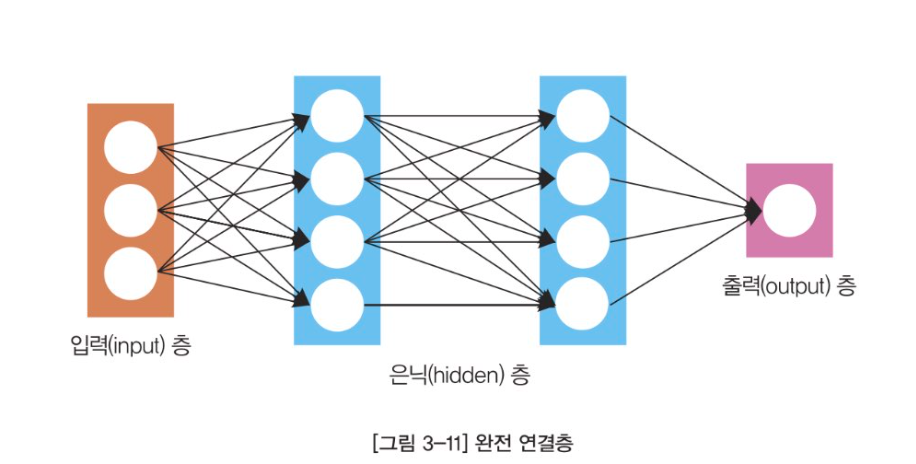



dense 레이어를 구성하는 노드개수와 활성화개수를 지정할 수 있다. 텐서플로의 레이어 모듈에 있는 덴스레이어로 쉽게 구현 가능하다. 노드개수를 덴스 레이어의 첫 위치 인자로 지정하면 된다. 또한 덴스 렝이ㅓ의 activation 매개변수에 활성화 함수를 지정하여 적용할 수 ㅣ있다.


In [5]:
import tensorflow as tf

tf.keras.layers.Dense(10)

tf.keras.layers.Dense(10, activation = 'relu')

## 2-4 dataset 생성
단순 선형회귀모형을 지도학습 방식으로 훈련하기 위해 데이터를 생성한다.

In [6]:
x = np.arange(1,6)

y = 3*x + 2
print(x)
print(y)

[1 2 3 4 5]
[ 5  8 11 14 17]


지도학습은 정답이 있는 데이터를 활용해 데이터를 학습시키는 것으로 주입할 입력데이터를 피처라 하고 정ㄷ답은 레이블이라 한다. 머신러닝은 이 외ㅔ도 비지도학습 , 강화학습, 준지도학습 등이 있다,

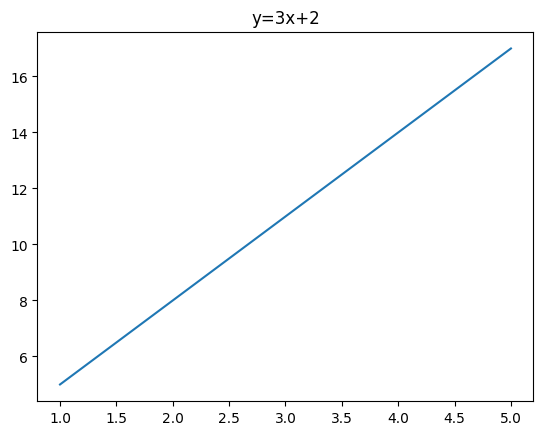

In [7]:
import matplotlib.pyplot as plt
plt.plot(x,y)
plt.title('y=3x+2')
plt.show()

## 2-5 sequential api
텐서플로 케라스는 세가지 방식으로 모델을 생성하는데 그 중 sequential api는 층을 이어붙이듯 시퀀스에 맞게 일렬로 연결하는 방식이다. 따라서 입력레이어부터 출력레이어까지 순서를 갖는다.

입력 데이터는 시퀀스의 가장 앞에 위치한 층에 투입되고 순서대로 각 층을 하나씩 통과하면서 딥러닝 연산을 통과한다.

단 다중 입력이나 다중 출력을 갖는 경우 뒤에서 배울 functional api를 사용한다.

### 2-5-1 모델 구조
sequential api를 사용하여 모델을 생성하는 방법은 두가지이다.


리스트형 정의로 시퀀셜 클래스 함수에 파이썬 리스트형태로 여러개의 층을 입력한다. 대괄호 안에 쉼표로 구분하여 층을 쌓는다. 앞에 위치한 층부터 연산을 먼저 처리하고 순차적으로 다음 층의 연산을 수행하게 된다. 다음 코드는 dense 레이어 3개를 갖는 모델을 생성한다.


In [8]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1),
])

add 함수의 레이어추가로 시퀀셜 클래스 객체를 먼저 만든 뒤 생성된 모델인스턴스에 층을 추가하는 방식이다.

In [9]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(5))
model.add(tf.keras.layers.Dense(1))

### 2-5-2 입력데이터 형태
시퀀셜 api를 사용하여 모델 구성시 첫번째층은 input shape 매개변수를 지정해야 한다. input shape 매개변수는 주입할 데이터셋의 shape을 튜플 또는 리스트로 지정할 수 있다.

In [10]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[4]),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1)
])

### 2-5-3 단순선형회귀 모델 정의

1개의 뉴런을 갖는 dense레이어 한개를 통해 단순선형회귀모델을 생성한다. 여기에 정의한 1개의 뉴런은 기울기에 ㄷ해당하는 w와 상수항에 해당하는 b를 매개변수로 갖는다.

1 ㅏ함수식 y=wx+b에서 입력데이터는 x값을 나타내는 입력변수 1개만 존재하기 때문에 inputshape=[1]로 지정한다. 1개의 뉴런을 가지는 dense레이어는 1개의 출력값을 가지므로 출력값은 y에 대한 모델의 예측값이다.

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

## 2-6 모델 요약
모델 서머리를 통해 모델의 요약을 확인할 수 있다.

모델의 요약내용은 노트북 셀에서 출ㄹ력값으로 확인 가능하다. 모델의 구조와 층별 노드개수를 확인할 수 있다. 요약 하단에는 훈련시 업데이트할 파라미터의 개수가 표기된다.

토탈 파람스는 모델 내부에 존재하는 모든 파라미터의 합계가 표기된다, trainable params 는 모델 훈련 시 업데이트할 파라미터의 총 개수를 나타내고 non trainable parmas는 훈련시 업데이트하지 않ㅇ르 파라미터의 총 개수를 나타낸다.

## 2-7 컴파일
컴파일 단계에서는 모델의 훈련과정에서 적용할 옵티마이저, 손실함수, 그리고 평가지표 등을 정의한다. 옵티마이저, 평가지표, 손실함수는 3가지 방법으로 지정할 수 있다.

클래스 인스턴스로 지정할 경우 학습률, 모멘텀 등의 하이퍼파라미터를 사용자가 직접 지정할 수 있다. 하지만 문자열로 지정하는 경우 기본값으로 설정된 하이퍼파라미터를 사용하며 하이퍼 파라미터 수정은 어렵다는 한계가 있다.


In [12]:
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['mean_squared_error', 'mean_absolute_error'])

In [13]:
model.compile(optimizer='sgd', loss='mse', metrics=['mse', 'mae'])

In [16]:
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.005),
              loss=tf.keras.losses.MeanAbsoluteError(),
              metrics=[tf.keras.metrics.MeanAbsoluteError(),
                       tf.keras.metrics.MeanSquaredError()])

In [18]:
# compile
model.compile(optimizer='sgd', loss='mse',metrics=['mae'])

## 2-8 훈련
생성한 모델 인스턴스에 fit 메서드를 사용하면 데이터를 읿력하여 모델을 훈련시킬 수 있다. 텐서를 업데이트 하는 과정으로 fit method는 훈련용 데이터셋의 입력고 ㅏ정답에 해당하는 출력, 반복 후녈ㄴ할 에폭수를 지정한다. 에폭이 끝날때마다 훈련 데이터셋에 대한 손실과 평가지표를 출력한다.

검증데이터셋 옵션을 선택한 경우 검증셋에 대한 손실고 ㅏ평가지표도 출력한다.

In [21]:
model.fit(x,y,epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 10ms/step - loss: 7.8609 - mae: 2.7293
Epoch 2/5
1/1 [==============================] - 0s 10ms/step - loss: 4.6804 - mae: 2.1290
Epoch 3/5
1/1 [==============================] - 0s 8ms/step - loss: 2.8264 - mae: 1.6706
Epoch 4/5
1/1 [==============================] - 0s 8ms/step - loss: 1.7452 - mae: 1.3205
Epoch 5/5
1/1 [==============================] - 0s 7ms/step - loss: 1.1145 - mae: 1.0531


5번의 훈련이 끝난 뒤 손실함수는 기록값을 알려준다,

매 훈련당 로스를 보면 예측오차가 감소하는 것 즉 모델이 잘 학습되는 것을 알 수 있따. 하지만 반복훈련 수가 충분하지 않아 학습ㅇ ㅣ덜 되었다고 볼 수 있다.에폭을 늘려서 추가학습을 하면 손실을 더욱 낮출 수 잇을 것을 보인다. 즉 과소적합 상태이다.

이번에ㅡㄴ 에폭에 1200을 지정하여 충분히 훈련할 수 있도록 한다. 히스토리 변수를 생성하여 에포별 훈련손실과 평가지표가 딕셔너리형태로 저장될 수 ㅣㅇㅆ도록 한다.

In [23]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])
# 컴파일
model.compile(optimizer='sgd', loss='mse',metrics=['mae'])
history = model.fit(x,y,epochs=1200)

Epoch 1/1200
1/1 [==============================] - 1s 763ms/step - loss: 169.5477 - mae: 12.1163
Epoch 2/1200
1/1 [==============================] - 0s 17ms/step - loss: 98.8772 - mae: 9.2884
Epoch 3/1200
1/1 [==============================] - 0s 25ms/step - loss: 57.6935 - mae: 7.1295
Epoch 4/1200
1/1 [==============================] - 0s 18ms/step - loss: 33.6932 - mae: 5.4813
Epoch 5/1200
1/1 [==============================] - 0s 16ms/step - loss: 19.7065 - mae: 4.2230
Epoch 6/1200
1/1 [==============================] - 0s 11ms/step - loss: 11.5552 - mae: 3.2622
Epoch 7/1200
1/1 [==============================] - 0s 23ms/step - loss: 6.8046 - mae: 2.5287
Epoch 8/1200
1/1 [==============================] - 0s 11ms/step - loss: 4.0357 - mae: 1.9686
Epoch 9/1200
1/1 [==============================] - 0s 12ms/step - loss: 2.4217 - mae: 1.5409
Epoch 10/1200
1/1 [==============================] - 0s 14ms/step - loss: 1.4806 - mae: 1.2143
Epoch 11/1200
1/1 [==============================]

충분한 에폭동안 훈련 후 mse, mae 모두 개선되었음을 확인할 수 있다. 훈련에 대한 결과가 저장된 history 변수를 사용하여 에폭별 훈련 손실 및 평가지표를 시각화할 수 있다.


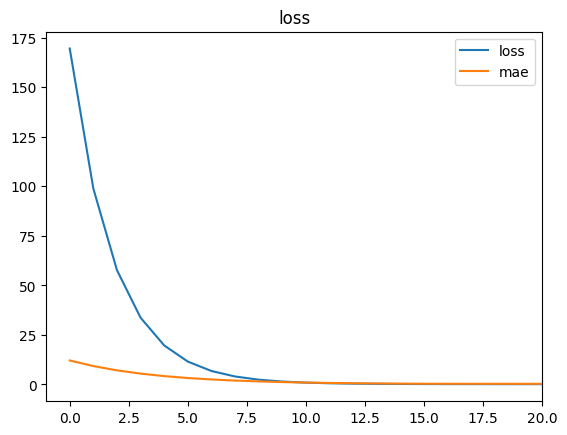

In [24]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['mae'], label='mae')
plt.xlim(-1,20)
plt.title('loss')
plt.legend()
plt.show()

첫 에폭까지 손실이 급격히 감소하다 감소폭이 둔화되는 것으로 즉 훈련 초기단계에는 학습이 매우 빠른 속도로 진행ㅎ되다 일정 에폭 이후에는 학습 속도가 느려지는 패턴을 보이고 잇다.

## 2-9 검증

모델 인스턴스의 평가 메소드로 모델의 성능을 검증할 수 있다. 일반적으로 검증 데이터셋을 입력하여 검증한다.

In [25]:
model.evaluate(x,y)

1/1 [==============================] - 0s 215ms/step - loss: 5.2660e-05 - mae: 0.0062


[5.265989966574125e-05, 0.006228637881577015]

두개의 지표 로스, mae값이출력되며 모델의 검증 결과를 보여준다. 검증단계에서는 모델이 훈련을 마친 상태의 가중치를 그대로 적용하여 손실고 ㅏ평가지표를 계산하기 때문에 모델훈련단계의 1200번 에폭 종료와 값이 같다.

## 2-10 예측

훈련이 완료된 모델 인스턴스의 예측 메서드에 새 입력 데이터를 넣으면 모델의 예측값을 넣을 수 있다. 다음과 같이 예측을 위한 입력 x를 예측의 인자로 지정한다. 

In [26]:
model.predict([10])


1/1 [==============================] - 0s 132ms/step


array([[32.0301]], dtype=float32)

모델이 예측 결과로 출력하는 값은 정답에 근사한 것을 알 수 있다

# 03 심층 신경망으로 이미지 분류
이번에는 심층 신경망으로 이미지 분류 모델을 생성한다. 이미지 분류를 위해 단층이 아닌 더 깊은 층을 쌓아 딥러닝 모델을 생성한다. 훈련에 필요한 데이터셋은 케라스 내장 데이터셋을 가져와 사용한다.

## 3-1 케라스 내장 데이터셋 로드

케라스는 모델훈련에 필요한 샘플 데이터셋을 제공한다. 

보스톤 주택가격데이터, Cifar10 cifar100 이미지 분류 데이터, mnist 손글씨 데이터셋, 패션 의류 데이터셋, 영화 데이터셋, retuters 뉴스토픽이 있다.


In [28]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

mnist 변수에 로드 데이터 메소드르 적용하면 구글의 storage로부터 넘파이배열로 구성된 데이터셋을 다운받는다. 앞에서 설명한 것처럼 훈련데이터셋과 검증 데이터셋을 반환하기 때문에 훈련 셋과 검증 셋을 튜플로 정의한다.

xtrain, ytrai은 각각 훈련셋의 입력데이터와 출력 데이터를 나타낸다, 마찬가지로 xtest, ytest는 검증셋의 입출력 데이터를 저장한다,

In [30]:
(x_train, y_train),(x_test, y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


훈련 셋에는 육만개으 ㅣ데이터ㅏ 검증셋에는 만개의 데이터가 저장되어 있다는 것을 확인할 수 ㅣㅇㅆ다. 입력데이터에 해당하는 xtrain, test에는 손글씨 이미지 데이터가 저장되어있고 배열의 모양은 데이터셋 크기임을 알 수 있다. 이ㅣ 떄shape의 첫번째는 데이터셋의 크기를 나타내며 두번째 세번쨰는 이미지의 세로 가로 픽셀 크기를 나타낸다

In [31]:
print('train set:', x_train.shape, y_train.shape)
print('test set:', x_test.shape, y_test.shape)


train set: (60000, 28, 28) (60000,)
test set: (10000, 28, 28) (10000,)


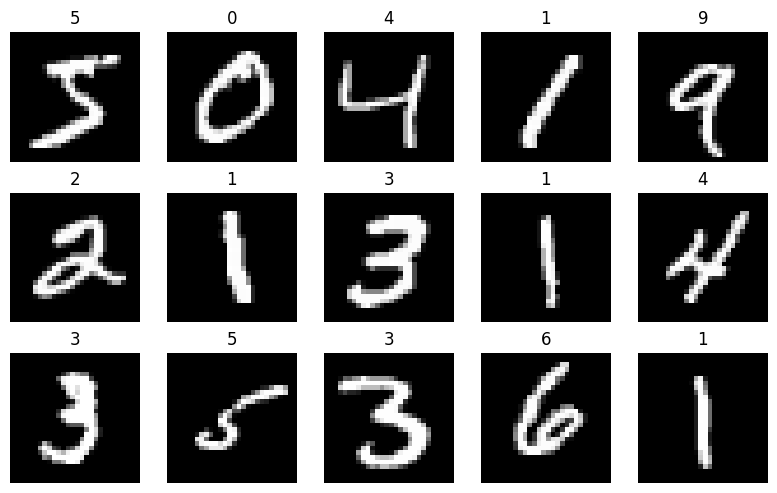

In [32]:
# visualizer
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3,5)
fig.set_size_inches(8,5)
for i in range(15):
  ax = axes[i//5, i%5]
  # imshow로 이ㅣㅁ지 시각화
  ax.imshow(x_train[i], cmap='gray')
  ax.axis('off')
  ax.set_title(str(y_train[i]))
plt.tight_layout()
plt.show()

mnist 데이터셋은 손글씨 데이터셋으로 사람의 필기체로 쓰인 0-9까지의 숫자데이터셋으로 0-9까지 총 10개의 정답레이블로 구성된다.

## 3-2 데이터 전처리
이미지 데이터에 대해 정규화를 통해 데이터의 범위를조절한다. x_train은 넘파이 배열이며 배열의 각 원소는 이미지를 구성하나ㅡㄴ 하나의 픽셀값과 일대일 매칭된다.

In [33]:
x_train[0, 10:15, 10:15]

array([[  1, 154, 253,  90,   0],
       [  0, 139, 253, 190,   2],
       [  0,  11, 190, 253,  70],
       [  0,   0,  35, 241, 225],
       [  0,   0,   0,  81, 240]], dtype=uint8)

면 0-255값으로 이루어진 것을 확인할 수 있다. 정규화를 위해 데이터으 ㅣ최대값인 255로 나눈다.

In [34]:
print(f'정규화 전] 최소값:{x_train.min()}, 최대값:{x_train.max()}')

x_train = x_train/ x_train.max()
print(f'정규화 후] 최소값:{x_train.min()}, 최대값:{x_train.max()}')


정규화 전] 최소값:0, 최대값:255
정규화 후] 최소값:0.0, 최대값:1.0


In [35]:
# same in test set
x_test = x_test/ x_test.max()


In [36]:
x_train[0, 10:15, 10:15]

array([[0.00392157, 0.60392157, 0.99215686, 0.35294118, 0.        ],
       [0.        , 0.54509804, 0.99215686, 0.74509804, 0.00784314],
       [0.        , 0.04313725, 0.74509804, 0.99215686, 0.2745098 ],
       [0.        , 0.        , 0.1372549 , 0.94509804, 0.88235294],
       [0.        , 0.        , 0.        , 0.31764706, 0.94117647]])

## 3-3 flatten layer
 정규화후의 xtrainshape은 원본 배열과 동일하다. 개별 데이터값으 범위는 축소되어도 배열은 유지된다.

 샘플 이미지 형태는 2차우너 입력으로 dense레이어에 넣을 수 없기 때문에 1차우너으로 전처리한다.

In [38]:
print(f'변경 전] shape:{x_train.shape}')
print(f'1D으로 변경 후:{x_train.reshape(60000, -1).shape}')

변경 전] shape:(60000, 28, 28)
1D으로 변경 후:(60000, 784)


또는 flatten 레이어를 적용하여 다차원 데이터를 1차원으로 펼쳐주는 방법도 가능하다.

In [46]:
print(f'변경 전] shape:{x_train.shape}')
print(f'1D으로 변경 후:{tf.keras.layers.Flatten()(x_train).shape}')

변경 전] shape:(60000, 28, 28)
1D으로 변경 후:(60000, 784)


## 3-4 활성화 함수
활성화 함수는 입력을 비선형 출력으로 변환해주는 함수이다. 일반적으로 선형관계를 나타내는 함수에 비선형성을 추갛나ㅡㄴ 방법으로 표현하기도 한다. 한편 비선형성을 추가하지 않고 선형 함수로만 층을 구성할 경우 최종적으로 결국 선형함수로 표현된다.

주로 사용하는 함수는 다음과 같다.

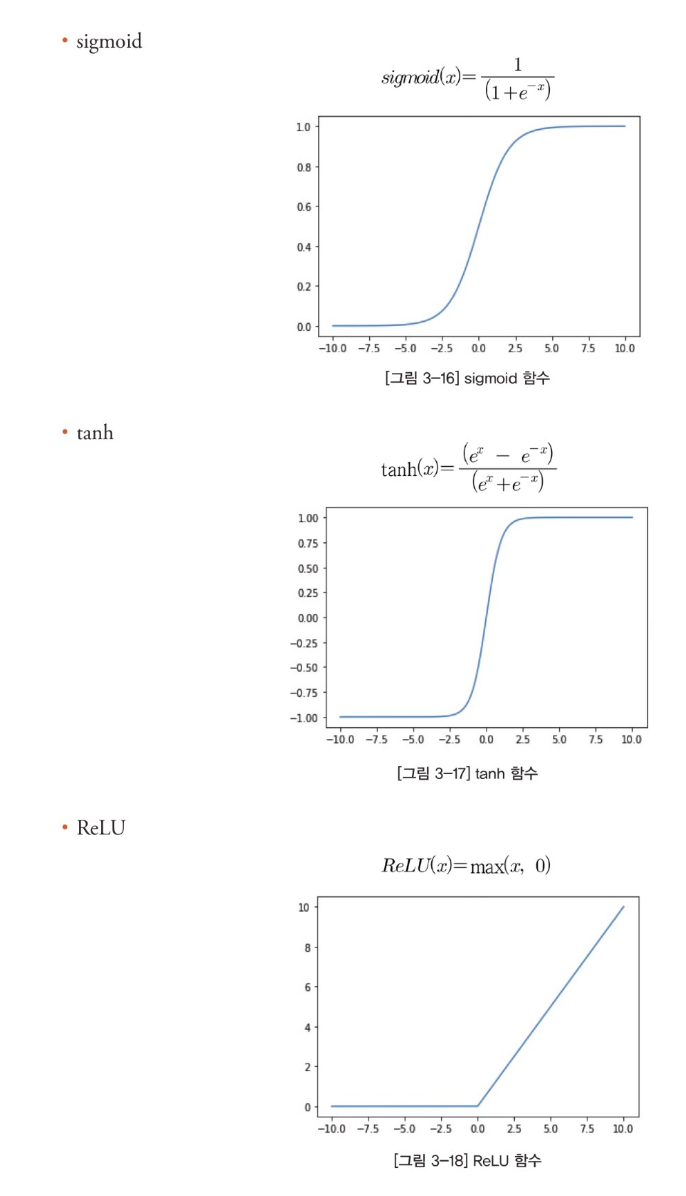

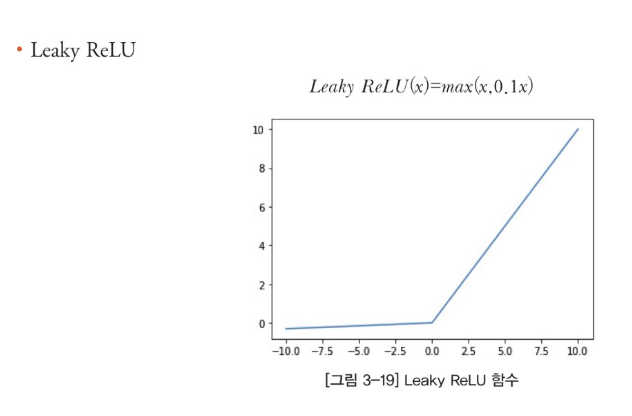

텐서플로 케라스 레이어에 활성화 함수를 적용하고 싶다면 다음과 같이 설정한다.activation 매개변수에 활성화함수명 문자열을 대입한다.

In [47]:
tf.keras.layers.Dense(128, activation='relu')

다음과 같이 별도 층처럼 적용도 가능하다. 이 경우 배치정규화를 적용한 후 활성화 함수를 적용하고자 할 때 많이 사용된다. 즉 레이어 구성을 커스터마이징 할 때 주로 사용돈다.

In [48]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128),
    tf.keras.layers.Activation('relu')
])

## 3-5 입력과 출력

딥러닝 모델을 만들 때에는 첫번쨰레이어에 입력 데이터의 형태를 나타내는 input shape 매개변수를 지정하는 것이 일반적이다. 

분류모델의 가장 마지막 레이어는 출력층으로 출력층의 노드 개수는 반드시 분루해야할 클래스 개수오ㅓㅏ 동일해야한다.

In [49]:
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

노드개수가 2개 이상일 경우 소프트맥스 활성화 함수를 적용한다. 다중 분류 문제에서는 소프트맥스를 사용한다. 반면 이진분류에서는 시그모이드이나 출력레이어가 원핫인코딩되어 노드가 2개인 경우는 소프트맥스

In [50]:
#출력층 노드 =1 인 경우, sigmoid
tf.keras.layers.Dense(1, activation='sigmoid')
#출력층 노드 =2 이상인 경우, softmax
tf.keras.layers.Dense(10, activation='softmax')

## 3-6 손실함수

출력층에 따라 올바르게 해야함
마지막 출력층이 dense(1, activation='sigmoid') > Loss='binary_crossentropy'

Dense(2 이상, activation='softmax') > Loss = 'categroical_crossentropy', loss='sparse_categorical_crossentropy'

In [51]:
model.compile(loss='binary_crossentropy')

출력층의 노드 개수가 2개 이상일경우 소프트맥스를 지정하고 손실함수는 원핫백터인경우 categorical crossentropy, 아닌 경우 sparse categorical entropy

mnist 손글씨 데이터셋은 클래스개수가 10개이므로 마지막 출력층에 해당하는 뎅스 레이어 노드 개수를 10으로 지정함. 워핫이 아니고 레이블값이 0-9이므로 sparse categorical entropy를 지정한다

In [52]:
model.compile(loss='categorical_crossentropy')

model.compile(loss='sparse_categorical_crossentropy')

## 3-7 옵티마이저

손실을 낮추기 위해 신경망의 가중치와 학습률과 같은 신경망의 속성을 변경하는 최적화 방버븡로

sgd, Adam, Adagrad, Nadam, RMSprop, Adadelta, Adamax, Ftrl가 있다.

클래스 인스턴스로 지정하거나 문자열로 지정한다. 문자열로 지정시에는 클래스 이름을 소문자로 표기한다. 직접 파라미터명을 설정할 수 있다.

In [53]:
adam=tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=adam)

model.compile(optimizer=['adam'])

## 3-8 평가지표

주로 정확도가 ㅅ용되며 auc, precision, recall도 많이 사용된다. 모델 컴파일 단계에서 metrics 매개변수에 파이선 리스트 형태로 하나 이상의 평가지표를 지정하여 여러 지표들을 동시에 참고할 수 잇다.

In [54]:
acc=tf.keras.metrics.SparseCategoricalAccuracy()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=[acc])

In [55]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## 3-9 훈련

검증셋이 별도로 존재하는 mnist 데이터셋. 검증셋을 모델 지정시 추가 지정하면, 매 에폭마다 훈련 손실과 검증 손실, 그리고 각 셋에대한 평가지표를 나란히출력한다.

validation data매개변수에 튜플 형식의 검저ㅡㅇ셋을 지정한다.

In [56]:
model.fit(x_train, y_train,
          validation_data=(x_test, y_test),
          epochs=10)
     

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2291 - accuracy: 0.9307 - val_loss: 0.1283 - val_accuracy: 0.9579
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0960 - accuracy: 0.9710 - val_loss: 0.1170 - val_accuracy: 0.9582
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0666 - accuracy: 0.9787 - val_loss: 0.0772 - val_accuracy: 0.9753
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0504 - accuracy: 0.9834 - val_loss: 0.0756 - val_accuracy: 0.9769
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0407 - accuracy: 0.9868 - val_loss: 0.0746 - val_accuracy: 0.9782
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0344 - accuracy: 0.9886 - val_loss: 0.0812 - val_accuracy: 0.9769
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0294 - accuracy: 0.9901 - val_loss: 0.0695 - val_accuracy

## 3-10 평가

10회의 에폭이 끝나고 훈련종료 뒤 evaluate 메솓로 모델 성능을 검증하고 평과 결과를 확읺라 수 ㅣㅇㅆ다.

 컴파일 단계에서 지정한 손실과 정확도를 순서대로 반환하며, 그 중 정확도마 ㄴ따로 지정하여 출력하면 검증성능을 확인할 수 있다.

In [57]:
test_loss, test_acc=model.evaluate(x_test, y_test)

print('검증 셋 정확도:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0843 - accuracy: 0.9793
검증 셋 정확도: 0.9793000221252441


## 3-11 예측
훈련된 모델로 새 이미지에 대한 분류값을 예측하는 작업ㅇ르 수행할 수 있다. predict 메소드에 이미지 데이터를 넣어주면 모델의 예측 결과를 반환한다. 여기서는 예측에 필요한 새 데이터셋이 준비되어 있지 않기 때문에 검증 데이터셋으 ㅣ입력데이터인 xtest를 사용한다.

In [58]:
predictions=model.predict(x_test)


313/313 [==============================] - 1s 3ms/step


predictions 변수에 모델이 예측한 분류결과를 넘파이 배열 형태로 저장한다. 첫 입력 이미지에 대한 분류 결과를 출력해보면 다음과 같이 출력된다

In [59]:
predictions[0]


array([6.1718317e-13, 7.9712015e-07, 4.1010417e-10, 4.4591408e-07,
       7.5437184e-10, 1.3546124e-11, 4.3138358e-18, 9.9998361e-01,
       3.6493612e-12, 1.5024469e-05], dtype=float32)

모델의 마지막 출력층 노드 개수가 10개로 지정되었기 때문에 10개으 ㅣ값이 출력되었다.
10개으 ㅣ출력값은 분류확률 값으로 가장 높은 확률 값을 가진 클래스결과가 최종 예측값이다

In [60]:
import numpy as np

#0번 index에 대한 예측 클래스 출력
print(np.argmax(predictions[0]))

#첫 10개 index에 대한 예측 클래스 출력
print(np.argmax(predictions[:10], axis=1))

7
[7 2 1 0 4 1 4 9 5 9]


예측결과에 대한 시각화!

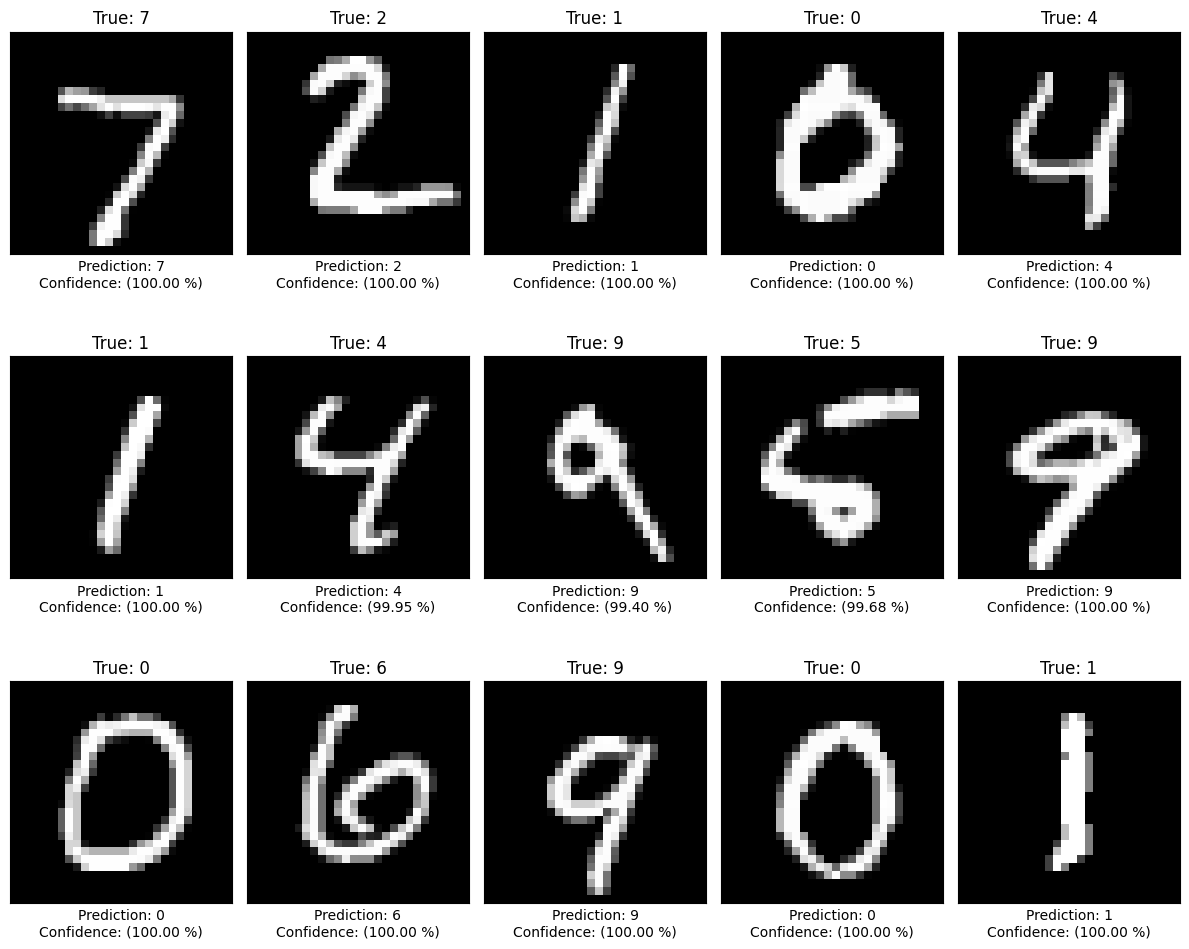

In [61]:
import matplotlib.pyplot as plt
def get_one_result(idx):
  img, y_true, y_pred, confidence=x_test[idx], y_test[idx], np.argmax(predictions[idx]), 100*np.max(predictions[idx])
  return img, y_true, y_pred, confidence

#canvas 생성
fig, axes=plt.subplots(3,5)
fig.set_size_inches(12, 10)
for i in range(15):
  ax=axes[i//5, i%5]
  img, y_true, y_pred, confidence=get_one_result(i)
  #imshow로 시각화
  ax.imshow(img, cmap='gray')
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_title(f'True: {y_true}')
  ax.set_xlabel(f'Prediction: {y_pred}\nConfidence: ({confidence:.2f} %)')
plt.tight_layout()
plt.show()